In [1]:
import requests
import tarfile
import os
import re
from pathlib import Path
import tempfile

def process_tex_includes(content, base_path):
    """
    Process \include and \input commands in a tex file, returning the full content.
    
    Args:
        content (str): The content of the main tex file
        base_path (Path): Path to the directory containing the main tex file
        
    Returns:
        str: Processed content with includes resolved
    """
    def replace_include(match):
        command = match.group(1)  # either 'include' or 'input'
        filename = match.group(2).strip()
        
        # Add .tex extension if not present for \include
        if command == 'include' and not filename.endswith('.tex'):
            filename += '.tex'
        
        # For \input, try with and without .tex extension
        include_path = base_path / filename
        if not include_path.exists() and not filename.endswith('.tex'):
            include_path = base_path / f"{filename}.tex"
        
        if include_path.exists() and include_path.is_file():
            try:
                with open(include_path, 'r', encoding='utf-8') as f:
                    included_content = f.read()
                    # Recursively process includes in the included file
                    return process_tex_includes(included_content, include_path.parent)
            except Exception as e:
                return f"% Error including {filename}: {str(e)}"
        else:
            return f"% Could not find included file: {filename}"
    
    # Pattern matches both \include{filename} and \input{filename}
    pattern = r'\\(include|input)\{([^}]+)\}'
    return re.sub(pattern, replace_include, content)

def get_arxiv_tex(identifier):
    """
    Download and extract arXiv source files, returning the main tex content with includes resolved.
    
    Args:
        identifier (str): Either full arXiv URL or just the paper number (e.g. '2412.06264')
        
    Returns:
        str: Content of the main tex file with all includes resolved
        
    Raises:
        ValueError: If the identifier is invalid or source files cannot be accessed
        RuntimeError: If no main tex file is found
    """
    # Extract paper number from URL if needed
    if identifier.startswith('http'):
        match = re.search(r'arxiv.org/(?:abs|pdf)/(\d+\.\d+)', identifier)
        if not match:
            raise ValueError("Invalid arXiv URL format")
        paper_number = match.group(1)
    else:
        # Verify the paper number format
        if not re.match(r'^\d+\.\d+$', identifier):
            raise ValueError("Invalid arXiv identifier format")
        paper_number = identifier
    
    # Create source URL
    source_url = f'https://arxiv.org/src/{paper_number}'
    
    # Download the source files
    response = requests.get(source_url)
    if response.status_code != 200:
        raise ValueError(f"Failed to download source files (Status code: {response.status_code})")
    
    # Create a temporary directory for extraction
    with tempfile.TemporaryDirectory() as temp_dir:
        # Save the downloaded tar file
        tar_path = Path(temp_dir) / 'source.tar.gz'
        with open(tar_path, 'wb') as f:
            f.write(response.content)
        
        # Extract the tar file
        with tarfile.open(tar_path, 'r:gz') as tar:
            tar.extractall(path=temp_dir, filter='data')
        
        # Look for main tex file
        tex_files = list(Path(temp_dir).rglob('*.tex'))
        if not tex_files:
            raise RuntimeError("No tex files found in the source")
        
        # Common main file names (all lowercase for comparison)
        main_candidates = [
            'main.tex',
            'paper.tex',
            'article.tex',
            'manuscript.tex',
            'submission.tex',
            'arxiv.tex',
            'document.tex',
            'draft.tex',
            'preprint.tex',
            'source.tex',
            'neurips.tex',
            'icml.tex',
            'iclr.tex',
            'aaai.tex',
            'ijcai.tex',
            f'{paper_number}.tex'
        ]
        
        main_file = None
        
        # First try common file names (case-insensitive)
        for candidate in main_candidates:
            for tex_file in tex_files:
                if tex_file.name.lower() == candidate:
                    main_file = tex_file
                    break
            if main_file:
                break
                
        # If no common names found, try the directory name
        if not main_file:
            for tex_file in tex_files:
                if tex_file.parent.name.lower() + '.tex' == tex_file.name.lower():
                    main_file = tex_file
                    break
        
        # If still no match, look for file with \documentclass
        if not main_file:
            for tex_file in tex_files:
                with open(tex_file, 'r', encoding='utf-8') as f:
                    content = f.read()
                    if r'\documentclass' in content:
                        main_file = tex_file
                        break
        
        # If still no main file found, use the first tex file
        if not main_file and tex_files:
            main_file = tex_files[0]
        
        if not main_file:
            raise RuntimeError("Could not identify main tex file")
        
        # Read the content and process includes
        with open(main_file, 'r', encoding='utf-8') as f:
            content = f.read()
            return process_tex_includes(content, main_file.parent)

# Example usage:
# tex_content = get_arxiv_tex('2412.06264')
# tex_content = get_arxiv_tex('https://arxiv.org/abs/2412.06264')

<>:9: SyntaxWarning: invalid escape sequence '\i'
<>:9: SyntaxWarning: invalid escape sequence '\i'
C:\Users\luigi\AppData\Local\Temp\ipykernel_17704\3305136990.py:9: SyntaxWarning: invalid escape sequence '\i'
  """


In [3]:
from latex_converter import clean_latex_file

input_file = './maintext.tex'  # Replace with your .tex file path
input_file = get_arxiv_tex('https://arxiv.org/abs/2410.15320')
clean_latex_file(input_file)

Cleaned file has been written to: output.txt


Step 0, Loss: 2.5677, Loss_data: 1.2475, Loss_lat: 1.3202
Step 200, Loss: -0.4774, Loss_data: -1.2263, Loss_lat: 0.7489
Step 400, Loss: -1.0597, Loss_data: -1.7797, Loss_lat: 0.7200
Step 600, Loss: -0.2073, Loss_data: -1.0153, Loss_lat: 0.8080
Step 800, Loss: -0.9722, Loss_data: -1.7260, Loss_lat: 0.7538
Step 1000, Loss: -0.5531, Loss_data: -1.3636, Loss_lat: 0.8105
Step 1200, Loss: -0.6807, Loss_data: -1.5064, Loss_lat: 0.8257
Step 1400, Loss: -0.5222, Loss_data: -1.2797, Loss_lat: 0.7575
Step 1600, Loss: -1.6434, Loss_data: -2.4263, Loss_lat: 0.7830
Step 1800, Loss: 0.2441, Loss_data: -0.5579, Loss_lat: 0.8021
Step 2000, Loss: -0.4741, Loss_data: -1.2330, Loss_lat: 0.7589
Step 2200, Loss: -1.6852, Loss_data: -2.3462, Loss_lat: 0.6610
Step 2400, Loss: -1.3482, Loss_data: -2.1925, Loss_lat: 0.8443
Step 2600, Loss: -1.8613, Loss_data: -2.5528, Loss_lat: 0.6915
Step 2800, Loss: -1.4169, Loss_data: -2.1857, Loss_lat: 0.7688
Step 3000, Loss: -1.6333, Loss_data: -2.5232, Loss_lat: 0.8899
St

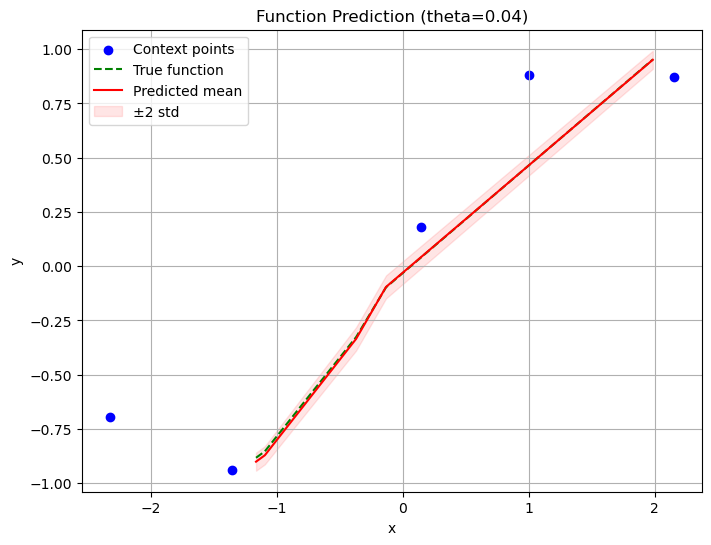

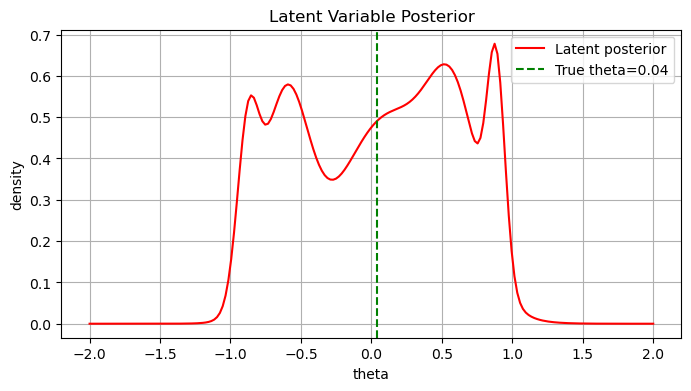

In [11]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Normal, Categorical
import random
import numpy as np
import matplotlib.pyplot as plt

# -------------------
# Utility functions
# -------------------

def mixture_log_prob(weights, means, scales, y):
    """
    Compute log probability under a mixture of Gaussians.
    weights: (..., K)
    means: (..., K)
    scales: (..., K)
    y: (..., 1)
    Returns: log_prob (...), scalar log probability per element
    """
    # y: (..., 1)
    # broadcast to match mixture shape
    diff = (y - means) / (scales + 1e-8)
    log_prob_comp = -0.5*diff**2 - torch.log(scales*math.sqrt(2*math.pi)+1e-8)
    # log mixture: logsumexp(log w + log p)
    logw = torch.log(weights+1e-12)
    m = torch.logsumexp(logw + log_prob_comp, dim=-1)
    return m

def sample_mixture(weights, means, scales):
    """
    Sample from mixture of Gaussians.
    weights: (..., K)
    means: (..., K)
    scales: (..., K)
    Returns: y_pred (...,), sampled values
    """
    # Store the original shape except the last dimension
    orig_shape = weights.shape[:-1]
    K = weights.shape[-1]
    
    # Reshape to (-1, K)
    weights = weights.reshape(-1, K)
    means = means.reshape(-1, K)
    scales = scales.reshape(-1, K)
    
    # Sample component indices
    comp = torch.multinomial(weights, 1)  # (N,1)
    idx = comp.squeeze(-1)  # (N,)
    
    # Gather means and scales
    m = means.gather(1, idx.unsqueeze(-1)).squeeze(-1)  # (N,)
    s = scales.gather(1, idx.unsqueeze(-1)).squeeze(-1)  # (N,)
    
    # Sample y from the selected Gaussian components
    y_pred = torch.normal(m, s)  # (N,)
    
    # Reshape back to the original batch and target dimensions
    y_pred = y_pred.reshape(*orig_shape)
    
    return y_pred

# --------------------
# Embedders
# --------------------

class ValueEmbedder(nn.Module):
    """
    Embed continuous values using an MLP.
    """
    def __init__(self, in_dim, emb_dim):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Linear(in_dim, emb_dim),
            nn.ReLU(),
            nn.Linear(emb_dim, emb_dim)
        )

    def forward(self, x):
        return self.mlp(x)

class ProbEmbedder(nn.Module):
    """
    Embed a probability distribution (represented as a histogram) into an embedding.
    """
    def __init__(self, in_dim, emb_dim):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Linear(in_dim, emb_dim),
            nn.ReLU(),
            nn.Linear(emb_dim, emb_dim)
        )
    def forward(self, p):
        return self.mlp(p)

# --------------------
# Transformer blocks
# --------------------

class MultiHeadAttention(nn.Module):
    def __init__(self, dim, n_heads=4):
        super().__init__()
        self.dim = dim
        self.n_heads = n_heads
        self.head_dim = dim // n_heads
        assert dim % n_heads == 0, "dim must be divisible by n_heads"
        self.query = nn.Linear(dim, dim)
        self.key = nn.Linear(dim, dim)
        self.value = nn.Linear(dim, dim)
        self.out = nn.Linear(dim, dim)

    def forward(self, Q, K, V):
        # Q, K, V: (B, N, D)
        B, Nq, D = Q.shape
        Nk = K.size(1)

        q = self.query(Q).view(B, Nq, self.n_heads, self.head_dim)
        k = self.key(K).view(B, Nk, self.n_heads, self.head_dim)
        v = self.value(V).view(B, Nk, self.n_heads, self.head_dim)

        q = q.transpose(1, 2) # (B, H, Nq, d)
        k = k.transpose(1, 2) # (B, H, Nk, d)
        v = v.transpose(1, 2) # (B, H, Nk, d)

        scores = (q @ k.transpose(-2, -1)) / math.sqrt(self.head_dim) # (B,H,Nq,Nk)
        attn = F.softmax(scores, dim=-1)
        out = attn @ v # (B,H,Nq,d)
        out = out.transpose(1, 2).contiguous().view(B, Nq, D)
        return self.out(out)

class TransformerLayer(nn.Module):
    def __init__(self, dim, n_heads=4, ff_dim=128):
        super().__init__()
        self.attn_ctx = MultiHeadAttention(dim, n_heads)
        self.norm1_ctx = nn.LayerNorm(dim)
        self.ff_ctx = nn.Sequential(
            nn.Linear(dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, dim)
        )
        self.norm2_ctx = nn.LayerNorm(dim)

        self.attn_tar = MultiHeadAttention(dim, n_heads)
        self.norm1_tar = nn.LayerNorm(dim)
        self.ff_tar = nn.Sequential(
            nn.Linear(dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, dim)
        )
        self.norm2_tar = nn.LayerNorm(dim)

    def forward(self, ctx, tar):
        # ctx and tar: (B, N, D) and (B, M, D)
        # Context self-attention:
        ctx_res = ctx
        ctx = self.attn_ctx(ctx, ctx, ctx)
        ctx = self.norm1_ctx(ctx + ctx_res)
        ctx_res2 = ctx
        ctx = self.ff_ctx(ctx)
        ctx = self.norm2_ctx(ctx + ctx_res2)

        # Target cross-attention:
        tar_res = tar
        tar = self.attn_tar(tar, ctx, ctx)
        tar = self.norm1_tar(tar + tar_res)
        tar_res2 = tar
        tar = self.ff_tar(tar)
        tar = self.norm2_tar(tar + tar_res2)

        return ctx, tar

# --------------------
# ACE model
# --------------------

class ACE(nn.Module):
    def __init__(self, x_dim=1, val_dim=1, latent_dim=1, emb_dim=64, n_heads=4, ff_dim=128, depth=4, K=5, discrete_values=None):
        """
        x_dim: dimension of input x
        val_dim: dimension of continuous values (for data)
        latent_dim: dimension of continuous latents (for simplicity)
        discrete_values: dict {var_name: #categories} if any discrete var
        K: number of mixture components for continuous outputs
        """
        super().__init__()
        self.emb_dim = emb_dim
        self.x_dim = x_dim
        self.val_dim = val_dim
        self.latent_dim = latent_dim
        self.K = K
        self.discrete_values = discrete_values if discrete_values is not None else {}

        # Learnable embeddings
        self.e_data = nn.Parameter(torch.randn(emb_dim))
        self.e_latent = nn.Parameter(torch.randn(emb_dim))
        self.e_unknown = nn.Parameter(torch.randn(emb_dim))

        # Embedders
        self.f_x = ValueEmbedder(x_dim, emb_dim) if x_dim > 0 else None
        # For continuous values:
        self.f_val = ValueEmbedder(val_dim, emb_dim)
        # For prior distribution (assuming 1D latent with histogram):
        self.f_prob = ProbEmbedder(100, emb_dim)  # example for 1D latent prior with 100 bins

        # Transformer layers
        self.layers = nn.ModuleList([TransformerLayer(emb_dim, n_heads, ff_dim) for _ in range(depth)])

        # Output heads:
        # For continuous: mixture of Gaussians: weights, means, scales
        # For discrete: categorical

        # Continuous output head for data:
        self.data_out = nn.Linear(emb_dim, 3*K) # weights, means, scales

        # Continuous latent output head:
        # We'll assume here the latent variable is also continuous scalar
        self.latent_out = nn.Linear(emb_dim, 3*K)

    def forward(self, x_c, y_c, latents_c, latents_p, x_t, latents_t, predict_latent=False):
        """
        x_c: (B, N, x_dim) context inputs
        y_c: (B, N, val_dim) context values
        latents_c: (B, L_c) observed latent values (continuous)
        latents_p: (B, n_bins) prior histogram for latent if given or None
        x_t: (B, M, x_dim) target inputs
        latents_t: (B, L_t) we want to predict these latents if present
        predict_latent: bool, whether to predict latent or data at target
                        (here, we show a simple scenario: either we predict data or latent)
        
        For simplicity:
        - We'll treat latents as scalar continuous variables. 
        - If latents_p is not None, we treat it as a prior given at runtime for the latent.

        In a more general scenario, you would handle multiple latents and data outputs by concatenating 
        or indexing them differently.
        """
        B = x_c.size(0)
        device = x_c.device

        # Embed context points
        # Data embeddings
        emb_c_list = []
        if self.x_dim > 0:
            emb_x_c = self.f_x(x_c) # (B,N,D)
        else:
            emb_x_c = torch.zeros(B, x_c.size(1), self.emb_dim, device=device)
        emb_y_c = self.f_val(y_c) # (B,N,D)
        emb_data_c = emb_x_c + emb_y_c + self.e_data

        emb_ctx = [emb_data_c]

        # Latent embeddings in context
        # If we have observed latent in context:
        if latents_c is not None:
            # Assume shape (B, Lc), we treat each latent as continuous scalar for simplicity
            emb_lat_c = self.f_val(latents_c.unsqueeze(-1)) + self.e_latent
            emb_ctx.append(emb_lat_c)

        # If a prior is given (one latent):
        if latents_p is not None:
            emb_prior = self.f_prob(latents_p) + self.e_latent
            # Expand to B, 1, D
            emb_prior = emb_prior.unsqueeze(1)
            emb_ctx.append(emb_prior)

        # Stack context: (B, N_ctx, D)
        emb_ctx = torch.cat(emb_ctx, dim=1)

        # Embed target points:
        # If predicting data at target, value unknown:
        if not predict_latent:
            # (B,M,D)
            emb_x_t = self.f_x(x_t) if self.x_dim > 0 else torch.zeros(B, x_t.size(1), self.emb_dim, device=device)
            emb_val_t = self.e_unknown.unsqueeze(0).unsqueeze(0).expand(B, x_t.size(1), self.emb_dim)
            emb_target = emb_x_t + emb_val_t + self.e_data
        else:
            # Predicting latent at target (assume we have a single latent), value unknown
            emb_val_t = self.e_unknown.unsqueeze(0).unsqueeze(0).expand(B, 1, self.emb_dim)
            emb_target = emb_val_t + self.e_latent

        # Pass through transformer layers
        ctx = emb_ctx
        tar = emb_target
        for layer in self.layers:
            ctx, tar = layer(ctx, tar)

        # Output heads
        # If predicting data, tar is (B,M,D)
        # If predicting latent, tar is (B,1,D)
        if predict_latent:
            out = self.latent_out(tar) # (B,1,3K)
            out = out.view(B, -1, 3*self.K)
            w_raw, m_raw, s_raw = torch.split(out, self.K, dim=-1)
            w = F.softmax(w_raw, dim=-1)
            s = F.softplus(s_raw) + 1e-5
            return w, m_raw, s
        else:
            out = self.data_out(tar) # (B,M,3K)
            w_raw, m_raw, s_raw = torch.split(out, self.K, dim=-1)
            w = F.softmax(w_raw, dim=-1)
            s = F.softplus(s_raw) + 1e-5
            return w, m_raw, s

# --------------------
# Demo Training Code
# --------------------

def synthetic_data(batch_size=32, n_ctx=5, n_tar=5, device='cpu'):
    """
    Generate a synthetic dataset where:
    y = sin(x) + theta
    theta ~ Uniform(-1,1)
    We also provide a prior over theta: a mixture or uniform.
    """
    x_c = torch.rand(batch_size, n_ctx, 1)*6 - 3  # range [-3,3]
    x_t = torch.rand(batch_size, n_tar, 1)*6 - 3
    theta = torch.empty(batch_size).uniform_(-1,1)
    
    # Create a prior histogram over [-2,2]:
    bins = torch.linspace(-2,2,101)
    # We'll do a simple Gaussian prior centered near the true theta for demonstration
    # In a real scenario, you'd use a more complex distribution.
    def make_prior(t):
        # Gaussian centered on t, std=0.5
        pdf = torch.exp(-0.5*((bins[:-1]+0.01-t)/0.5)**2)
        pdf = pdf/pdf.sum()
        return pdf
    latents_p = torch.stack([make_prior(th) for th in theta.to('cpu')], dim=0).to(device)
    
    y_c = torch.sin(x_c) + theta.unsqueeze(-1).unsqueeze(-1)  # Corrected to add two unsqueezes
    # For training, we predict data at target:
    # No latents in target for this demo. Just data.
    return x_c.to(device), y_c.to(device), theta.to(device), latents_p.to(device), x_t.to(device)

def train_demo():
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = ACE(x_dim=1, val_dim=1, latent_dim=1, emb_dim=64, n_heads=4, ff_dim=128, depth=4, K=5).to(device)
    opt = torch.optim.Adam(model.parameters(), lr=1e-3)

    # We'll train the model to predict target data given context data and a latent prior,
    # as well as to reconstruct the latent if asked.
    # In a real scenario, you'd train on multiple tasks and random splits.

    for step in range(10000):
        x_c, y_c, theta, latents_p, x_t = synthetic_data(device=device)
        # Train model to predict data at targets:
        w, m, s = model(x_c, y_c, latents_c=None, latents_p=latents_p, x_t=x_t, latents_t=None, predict_latent=False)

        # target values:
        y_t = torch.sin(x_t) + theta.unsqueeze(-1).unsqueeze(-1)

        # Compute loss:
        # log prob of y_t under mixture:
        lp = mixture_log_prob(w, m, s, y_t)
        loss_data = -lp.mean()

        # Additionally, let's predict the latent separately (not always needed):
        # We'll feed the same context but now ask to predict latent:
        w_lat, m_lat, s_lat = model(x_c, y_c, latents_c=None, latents_p=latents_p, x_t=None, latents_t=None, predict_latent=True)
        # shape: (B,1,K)
        # Probability of true theta:
        # Reshape y for mixture:
        theta_ = theta.unsqueeze(-1).unsqueeze(-1)
        lp_lat = mixture_log_prob(w_lat.squeeze(1), m_lat.squeeze(1), s_lat.squeeze(1), theta_)
        loss_lat = -lp_lat.mean()

        loss = loss_data + loss_lat

        opt.zero_grad()
        loss.backward()
        opt.step()

        if step % 200 == 0:
            print(f"Step {step}, Loss: {loss.item():.4f}, Loss_data: {loss_data.item():.4f}, Loss_lat: {loss_lat.item():.4f}")

    # After training, we can check predictions:
    model.eval()
    x_c, y_c, theta, latents_p, x_t = synthetic_data(batch_size=1, device=device)
    with torch.no_grad():
        w, m, s = model(x_c, y_c, None, latents_p, x_t, None, False)
        # sample predicted y_t:
        y_pred = sample_mixture(w, m, s)
    print("Sample prediction:", y_pred[0,:5])

    return model

def visualize(model, device='cpu'):
    # Generate a test sample:
    x_c, y_c, theta, latents_p, x_t = synthetic_data(batch_size=1, device=device)
    # Sort x_t for plotting a nice line
    x_t_sorted, indices = torch.sort(x_t, dim=1)
    # Predict data distribution at target
    with torch.no_grad():
        w, m, s = model(x_c, y_c, None, latents_p, x_t_sorted, None, False)

    # True function
    y_true = torch.sin(x_t_sorted) + theta.unsqueeze(-1).unsqueeze(-1)
    # Compute predictive mean and std from mixture
    # Mixture mean = sum_k w_k * m_k; var = sum_k w_k * (s_k^2 + m_k^2) - mean^2
    mean_pred = (w*m).sum(-1)
    var_pred = (w*(s**2 + m**2)).sum(-1) - mean_pred**2
    std_pred = var_pred.sqrt()

    # Convert to numpy
    x_c_np = x_c[0,:,0].cpu().numpy()
    y_c_np = y_c[0,:,0].cpu().numpy()
    x_t_np = x_t_sorted[0,:,0].cpu().numpy()
    y_true_np = y_true[0,:,0].cpu().numpy()
    mean_np = mean_pred[0].cpu().numpy()
    std_np = std_pred[0].cpu().numpy()

    # Plot the function prediction
    plt.figure(figsize=(8,6))
    # Context points
    plt.scatter(x_c_np, y_c_np, color='blue', label='Context points')
    # True function line
    plt.plot(x_t_np, y_true_np, 'g--', label='True function')
    # Prediction mean
    plt.plot(x_t_np, mean_np, 'r-', label='Predicted mean')
    # Uncertainty band
    plt.fill_between(x_t_np, mean_np - 2*std_np, mean_np + 2*std_np, color='red', alpha=0.1, label='±2 std')
    plt.title(f"Function Prediction (theta={theta.item():.2f})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Now visualize the latent predictive distribution:
    # We'll predict latent distribution by calling the model with no x_t (predict_latent=True)
    with torch.no_grad():
        w_lat, m_lat, s_lat = model(x_c, y_c, None, latents_p, x_t=None, latents_t=None, predict_latent=True)
    
    # w_lat, m_lat, s_lat: (B,1,K)
    w_lat = w_lat[0,0].cpu().numpy()
    m_lat = m_lat[0,0].cpu().numpy()
    s_lat = s_lat[0,0].cpu().numpy()
    # Create a grid for latent
    latent_grid = np.linspace(-2,2,200)
    lp = np.zeros_like(latent_grid)
    # Evaluate mixture on the grid
    for k in range(len(w_lat)):
        comp = 1/(np.sqrt(2*np.pi)*s_lat[k]) * np.exp(-0.5*((latent_grid - m_lat[k])/s_lat[k])**2)
        lp += w_lat[k]*comp

    plt.figure(figsize=(8,4))
    plt.plot(latent_grid, lp, 'r-', label='Latent posterior')
    # True latent
    plt.axvline(theta.item(), color='g', linestyle='--', label=f"True theta={theta.item():.2f}")
    plt.title("Latent Variable Posterior")
    plt.xlabel("theta")
    plt.ylabel("density")
    plt.legend()
    plt.grid(True)
    plt.show()

# --------------------
# Main Execution
# --------------------

model = train_demo()
visualize(model, device=model.parameters().__next__().device)

In [19]:
def visualize(model, device='cpu'):
    # Generate a test sample:
    x_c, y_c, theta, latents_p, x_t = synthetic_data(batch_size=1, n_tar=200, device=device)
    # Sort x_t for plotting a nice line
    x_t_sorted, indices = torch.sort(x_t, dim=1)
    # Predict data distribution at target
    with torch.no_grad():
        w, m, s = model(x_c, y_c, None, latents_p, x_t_sorted, None, False)

    # True function
    y_true = torch.sin(x_t_sorted) + theta.unsqueeze(-1).unsqueeze(-1)
    # Compute predictive mean and std from mixture
    # Mixture mean = sum_k w_k * m_k; var = sum_k w_k * (s_k^2 + m_k^2) - mean^2
    mean_pred = (w*m).sum(-1)
    var_pred = (w*(s**2 + m**2)).sum(-1) - mean_pred**2
    std_pred = var_pred.sqrt()

    # Convert to numpy
    x_c_np = x_c[0,:,0].cpu().numpy()
    y_c_np = y_c[0,:,0].cpu().numpy()
    x_t_np = x_t_sorted[0,:,0].cpu().numpy()
    y_true_np = y_true[0,:,0].cpu().numpy()
    mean_np = mean_pred[0].cpu().numpy()
    std_np = std_pred[0].cpu().numpy()

    # Plot the function prediction
    plt.figure(figsize=(8,6))
    # Context points
    plt.scatter(x_c_np, y_c_np, color='blue', label='Context points')
    # True function line
    plt.plot(x_t_np, y_true_np, 'g--', label='True function')
    # Prediction mean
    plt.plot(x_t_np, mean_np, 'r-', label='Predicted mean')
    # Uncertainty band
    plt.fill_between(x_t_np, mean_np - 2*std_np, mean_np + 2*std_np, color='red', alpha=0.1, label='±2 std')
    plt.title(f"Function Prediction (theta={theta.item():.2f})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Now visualize the latent predictive distribution:
    # We'll predict latent distribution by calling the model with no x_t (predict_latent=True)
    with torch.no_grad():
        w_lat, m_lat, s_lat = model(x_c, y_c, None, latents_p, x_t=None, latents_t=None, predict_latent=True)
    
    # w_lat, m_lat, s_lat: (B,1,K)
    w_lat = w_lat[0,0].cpu().numpy()
    m_lat = m_lat[0,0].cpu().numpy()
    s_lat = s_lat[0,0].cpu().numpy()
    # Create a grid for latent
    latent_grid = np.linspace(-2,2,200)
    lp = np.zeros_like(latent_grid)
    # Evaluate mixture on the grid
    for k in range(len(w_lat)):
        comp = 1/(np.sqrt(2*np.pi)*s_lat[k]) * np.exp(-0.5*((latent_grid - m_lat[k])/s_lat[k])**2)
        lp += w_lat[k]*comp

    plt.figure(figsize=(8,4))
    plt.plot(latent_grid, lp, 'r-', label='Latent posterior')
    # True latent
    plt.axvline(theta.item(), color='g', linestyle='--', label=f"True theta={theta.item():.2f}")
    plt.title("Latent Variable Posterior")
    plt.xlabel("theta")
    plt.ylabel("density")
    plt.legend()
    plt.grid(True)
    plt.show()

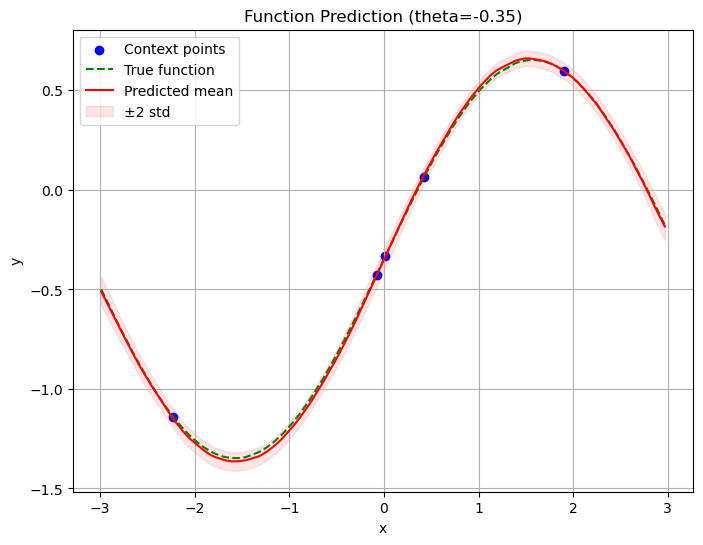

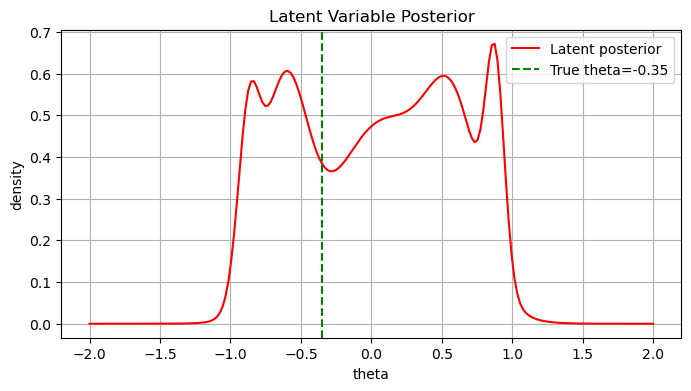

In [23]:
visualize(model, device=model.parameters().__next__().device)